In [78]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import json

In [ ]:
file_path = "..\\datasets\\base\\ru\\raw"


In [80]:
df = pd.read_csv(file_path + "\\train_eng.csv", sep='\t', encoding='cp1251')
df = df.loc[df['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])] # Пропускаем строки без класса
df = df.dropna(subset=['ref_txt'])
df_test = pd.read_csv(file_path + "\\test_eng.csv", sep='\t', encoding='cp1251',
                   on_bad_lines='skip')
df_test = df_test.loc[df_test['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])]
df_test = df_test.dropna(subset=['ref_txt'])

df['target'] = df['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+",el)[0]
                                            for el in x.split('\\')]))) # Для каждой строки извлекаем значения ГРНТИ 1 уровня

df_test['target'] = df_test['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+",el)[0]
                                            for el in x.split('\\')])))
df['target_2'] = df['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+.\d+",el)[0]
                                            for el in x.split('\\')])))
df_test['target_2'] = df_test['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+.\d+",el)[0]
                                            for el in x.split('\\')])))

In [81]:
with open('GRNTI_1_en.json', "r", encoding='utf-8') as code_file:
    grnti_mapping_dict_true_names = json.load(code_file) # Загружаем файл с кодами

In [82]:
grnti_mapping_dict_true_names

{'00': 'Social sciences in general',
 '02': 'Philosophy',
 '03': 'History. Historical sciences',
 '04': 'Sociology',
 '05': 'Demography',
 '06': 'Economics and economic sciences',
 '10': 'State and law. Legal sciences',
 '11': 'Politics and political sciences',
 '12': 'Science studies',
 '13': 'Culture. Cultural studies',
 '14': 'Public education. Pedagogy',
 '15': 'Psychology',
 '16': 'Linguistics',
 '17': 'Literature. Literary studies. Oral folk creativity',
 '18': 'Art. Art studies',
 '19': 'Mass communication. Journalism. Mass media',
 '20': 'Informatics',
 '21': 'Religion. Atheism',
 '23': 'Complex study of individual countries and regions',
 '26': 'Complex problems of social sciences',
 '27': 'Mathematics',
 '28': 'Cybernetics',
 '29': 'Physics',
 '30': 'Mechanics',
 '31': 'Chemistry',
 '34': 'Biology',
 '36': 'Geodesy. Cartography',
 '37': 'Geophysics',
 '38': 'Geology',
 '39': 'Geography',
 '41': 'Astronomy',
 '43': 'General and complex problems of natural and exact sciences',


In [83]:
targets = pd.value_counts(np.concatenate(df['target'].values))

In [84]:
targets

31    32271
29    30419
34    19239
61    17667
87     7875
44     5182
47     5119
53     4985
81     3924
28     3630
38     3545
49     3372
50     3098
39     2958
70     2535
45     2422
55     2401
41     2239
89     2201
30     2097
73     1633
62     1560
37     1485
76     1447
52     1433
27     1287
90      767
68      736
36      633
20      364
64      306
15      274
65      253
75      182
06      179
66      152
67       67
00       54
69       15
19       13
60        4
86        3
33        1
58        1
84        1
dtype: int64

In [85]:
targets = targets.drop(labels=['33'])

In [86]:
targets

31    32271
29    30419
34    19239
61    17667
87     7875
44     5182
47     5119
53     4985
81     3924
28     3630
38     3545
49     3372
50     3098
39     2958
70     2535
45     2422
55     2401
41     2239
89     2201
30     2097
73     1633
62     1560
37     1485
76     1447
52     1433
27     1287
90      767
68      736
36      633
20      364
64      306
15      274
65      253
75      182
06      179
66      152
67       67
00       54
69       15
19       13
60        4
86        3
58        1
84        1
dtype: int64

In [87]:
target_names = []
for el in targets.index:
    st_name = grnti_mapping_dict_true_names[el]
    serch_res = re.search(r"\.", st_name)
    if serch_res:
        target_names.append(st_name[:serch_res.start()])
    else:
        target_names.append(st_name)


In [88]:
target_names

['Chemistry',
 'Physics',
 'Biology',
 'Chemical technology',
 'Environmental protection',
 'Energy',
 'Electronics',
 'Metallurgy',
 'General and complex problems of technical and applied sciences and industries of the national economy',
 'Cybernetics',
 'Geology',
 'Communication',
 'Automation',
 'Geography',
 'Water management',
 'Electrical engineering',
 'Mechanical engineering',
 'Astronomy',
 'Space research',
 'Mechanics',
 'Transport',
 'Biotechnology',
 'Geophysics',
 'Medicine and health care',
 'Mining',
 'Mathematics',
 'Metrology',
 'Agriculture and forestry',
 'Geodesy',
 'Informatics',
 'Light industry',
 'Psychology',
 'Food industry',
 'Housing and communal services',
 'Economics and economic sciences',
 'Forestry and woodworking industry',
 'Construction',
 'Social sciences in general',
 'Fisheries',
 'Mass communication',
 'Printing',
 'Labor protection',
 'Nuclear technology',
 'Standardization']

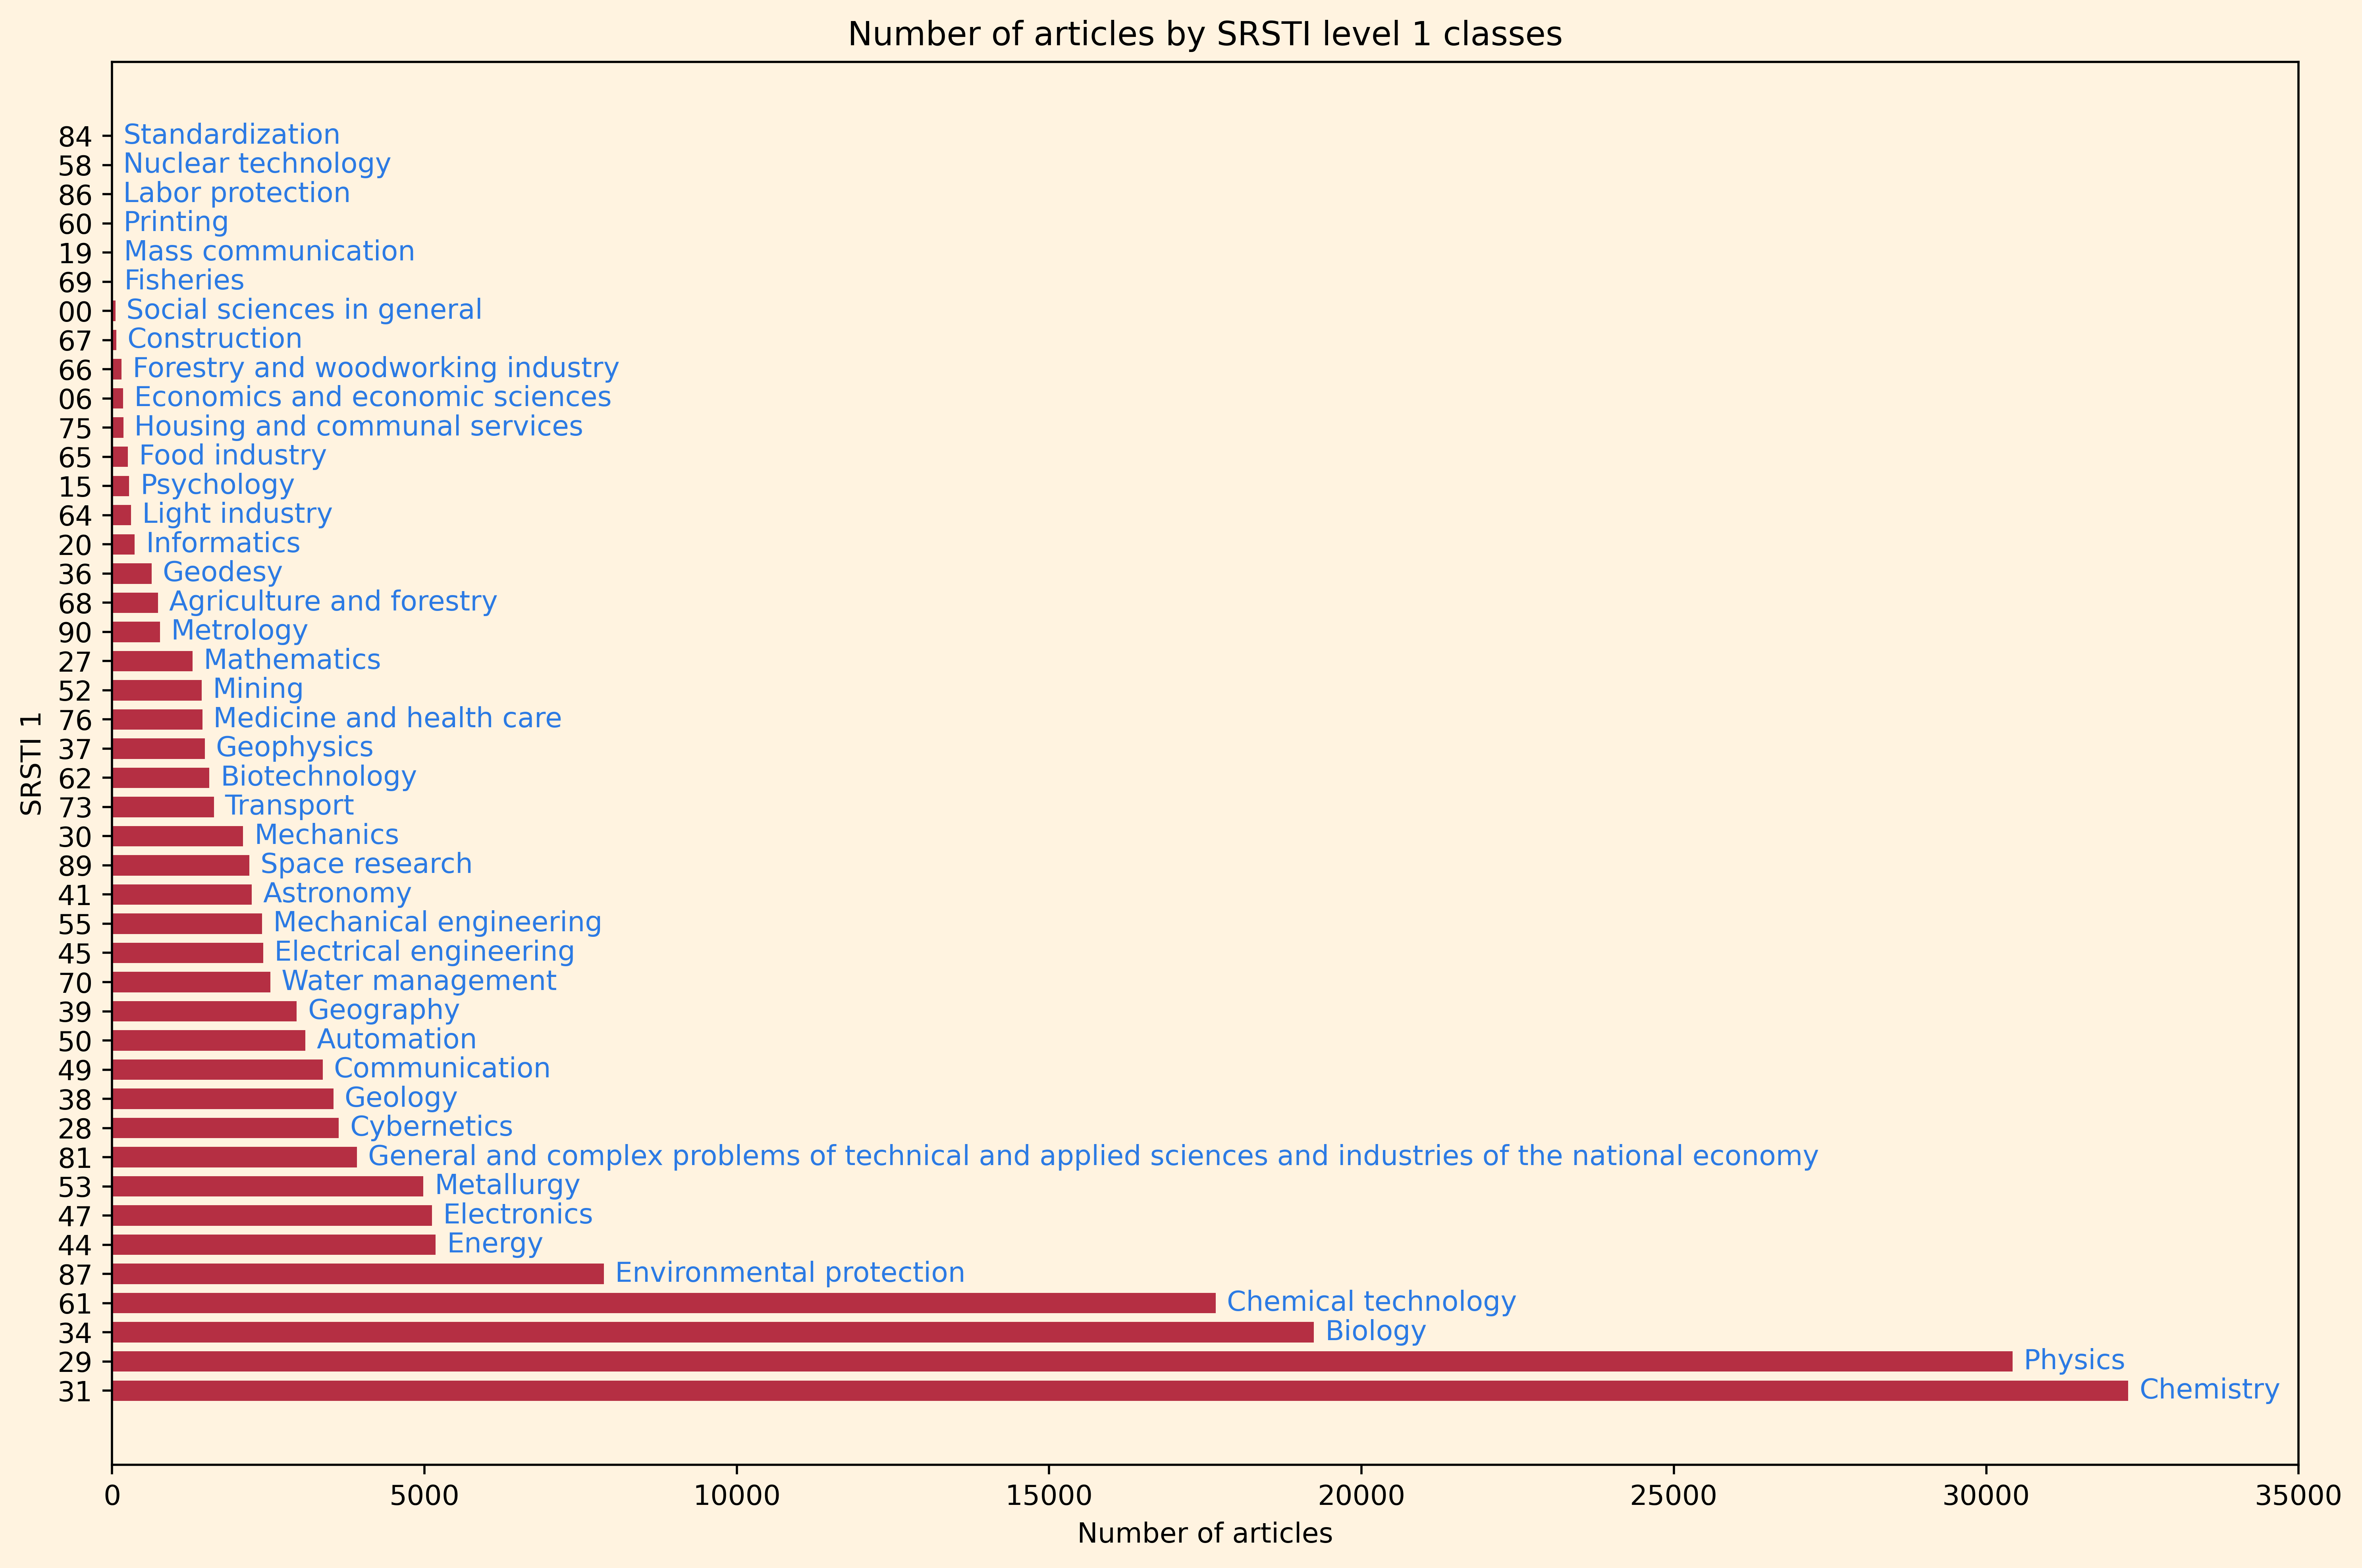

In [89]:
#creating a figure
fig = plt.figure(facecolor = "#fff3e0",figsize=(12,8), dpi=500)

#creating an axes
ax = plt.subplot(111,facecolor = "#fff3e0")

# specify the height of the bars
height= 0.7
# Make a horizontal barplot on the Axes
hbars = ax.barh(
    targets.index,
    targets,
    height=height,
    color="#b52f43"
    )
ax.bar_label(hbars,  labels=target_names,
             padding=4, color='#2b7ae4', fontsize=10)
ax.set_xlim(right=35000)#34000  # adjust xlim to fit labels

plt.title("Number of articles by SRSTI level 1 classes")
plt.ylabel("SRSTI 1")
plt.xlabel("Number of articles")
plt.tight_layout()
plt.savefig("Рисунок 3 eng.jpeg")

In [90]:
df.head()


,id_bo,title,ref_txt,kw_list,SUBJ,IPV,RGNTI,eor,target,target_2
4,J0805808035,Characterization of microbial processes in dee...,Micro-organisms must be included in any hydrog...,NaN,e5\e3,08Е\04Р1\04Б3\04Б2,34.27.23\34.27.39\38.61.05\62.71,###,"[34, 38, 62]","[62.71, 34.27, 38.61]"
5,J08423714116,Explicit eigenvalue estimates for transfer ope...,We consider transfer operators actdng on space...,Transfer operators; Bergman spaces; Eigenvalu...,e8,13Б,27.27.17,###,[27],[27.27]
6,J08581468221,An integral expansion for analytic functions b...,"In this work, by using a special property in t...",Expansion of functions; Linear functionals; T...,e8,13Б,27.27.15,###,[27],[27.27]
7,J0860693236,Uniqueness of entire functions that share one ...,"Using Nevanlinna's value distribution theory, ...",Entire function; Sharing value; Differential ...,e8,13Б,27.27.17,###,[27],[27.27]
8,J08674857341,Existence results for nonlinear nonlocal probl...,This work is concerned with nonlinear differen...,Nonlocal conditions; Accretive operator; Inte...,e8,13Б,27.39.27,###,[27],[27.39]


In [91]:
sets = {}
# targets = []
for target, ref_text in zip(df["target"], df["ref_txt"]):
    len_ref_text = len(ref_text)
    number_of_repeats = len_ref_text // 512  + (len_ref_text % 512 !=0)
    for el in target:
        sets.setdefault(el, 0)
        sets[el] += number_of_repeats

In [92]:
sorted_set = {k: v for k, v in sorted(sets.items(), key=lambda item: item[1], reverse=True)}

In [93]:
sorted_set.pop('33');

In [94]:
target_names2 = []
for el in sorted_set.keys():
    st_name = grnti_mapping_dict_true_names[el]
    serch_res = re.search(r"\.", st_name)
    if serch_res:
        target_names2.append(st_name[:serch_res.start()])
    else:
        target_names2.append(st_name)

In [95]:
#    ax.text(x_value if len(name) < 10 else x_value + len(name)*160, 
            # i + 1.5, name + " ", color="#2b7ae4",#"#faebd7", b52f43[42400, 33550, 27700, 22100, 20200, 17800]
            # ha='center', va='top', fontsize=10)


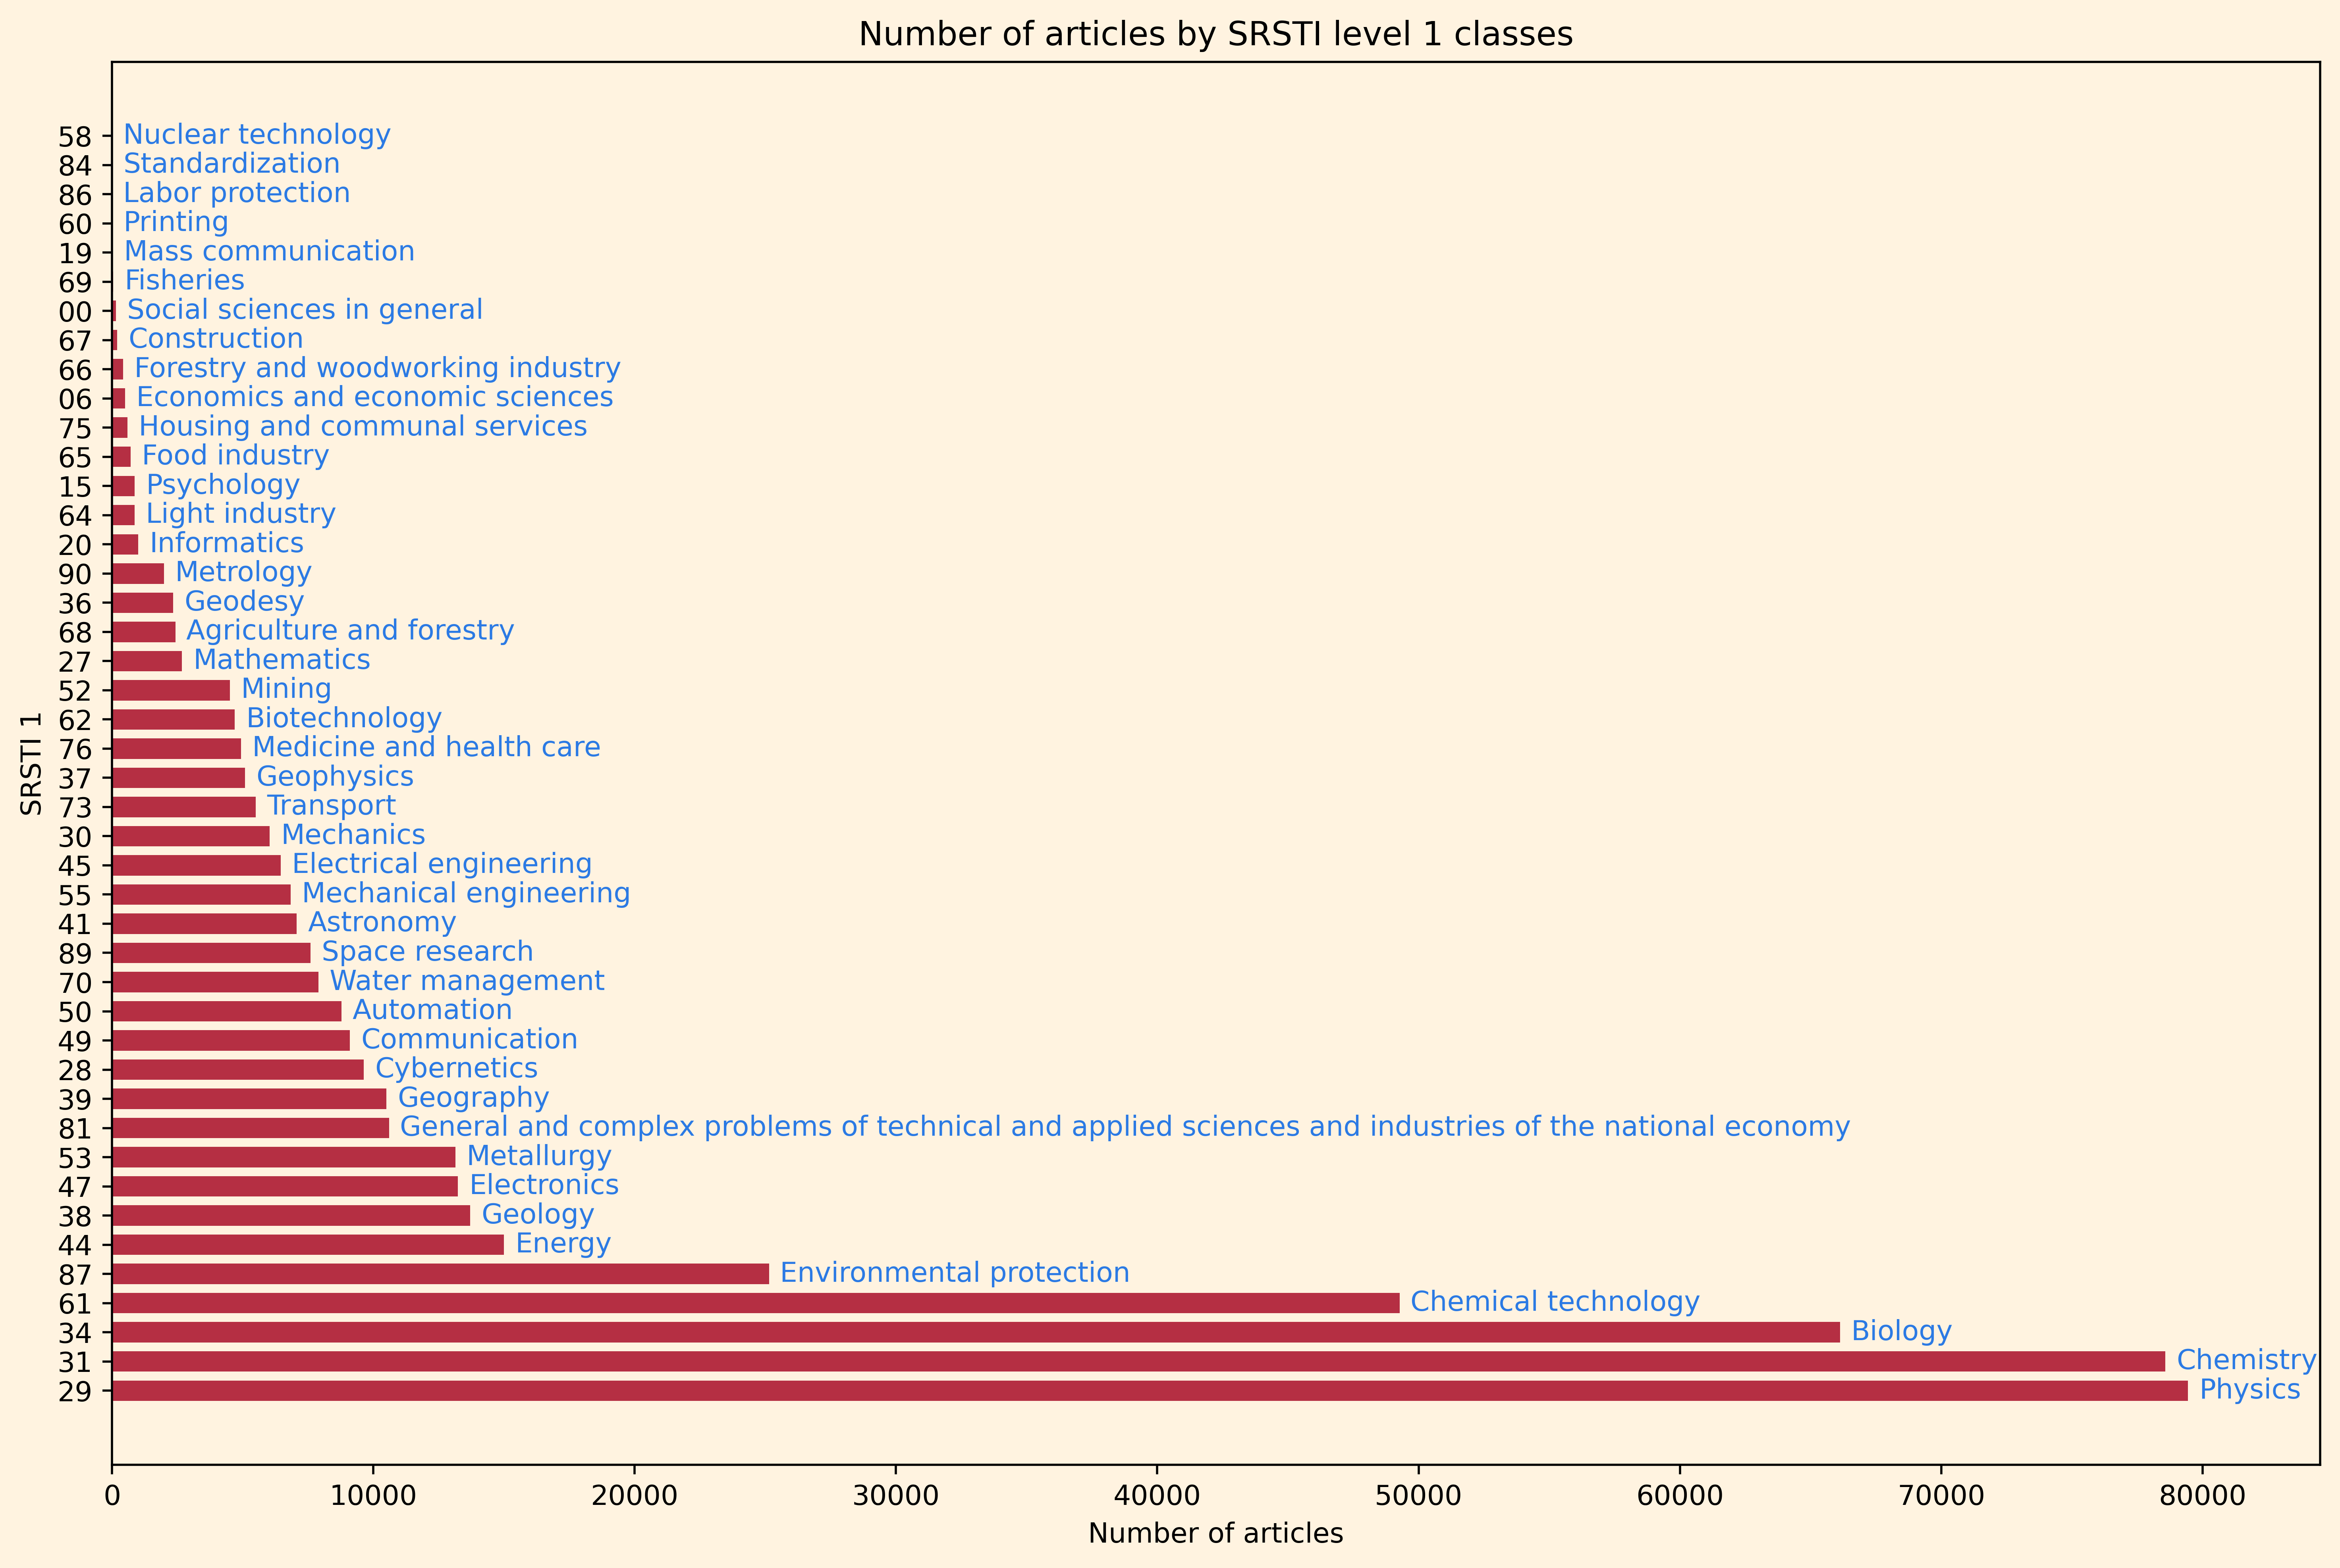

: 

In [ ]:
#creating a figure
fig = plt.figure(facecolor = "#fff3e0",figsize=(12,8), dpi=500)

#creating an axes
ax = plt.subplot(111,facecolor = "#fff3e0")

# specify the height of the bars
height= 0.7
# Make a horizontal barplot on the Axes
hbars2 = ax.barh(
    list(sorted_set.keys()),
    list(sorted_set.values()),
    height=height,
    color="#b52f43"
    )
 
ax.bar_label(hbars2,  labels=target_names2,
             padding=4, color='#2b7ae4', fontsize=10)
ax.set_xlim(right=84500)  # adjust xlim to fit labels

# for i, (name, x_value) in enumerate(zip(target_names2[:6], list(sorted_set.values())[:6])):
#    ax.text(x_value if len(name) < 15 else x_value + len(name)*400, 
#             i + 1.2, name + " ", color="#2b7ae4",#"#faebd7", b52f43[42400, 33550, 27700, 22100, 20200, 17800]
#             ha='center', va='top', fontsize=10)
plt.title("Number of articles by SRSTI level 1 classes")
plt.ylabel("SRSTI 1")
plt.xlabel("Number of articles")
plt.tight_layout()
plt.savefig("Рисунок 5 eng.jpeg")